# A simple C++ implementation of a convolutional neural network

<p style="color:blue"><b><i> Work in progress </i></b></p>

## Introduction

## Example of use on the MNIST dataset

In this section we show how to use the CNN on the example of the MNIST dataset. 
We do not aim for efficiency here, and choose hyperparameters which demaonstrate all the features of the implementation while keeping the resulting network relatively simple. 
In the next section, we will show how to tune the hyperparameters to optimise acuracy.

Our CNN implementation is found in the module `CNN3_cpp.so`. 
To use the MNIST dataset, we need to load the `mnist` module. 
We also load functions from the `numpy` and `os` modules we will use later, and the `pyplot` module to do plots.

In [1]:
import CNN3
import mnist 
from numpy import newaxis
from numpy.random import permutation as np_permutation
from os.path import exists
import matplotlib.pyplot as plt

We now define a few parameters. 
The string `save_file_name` is the name of the file in which the CNN will be saved. 

In [2]:
save_file_name = 'MNIST_CNN_1.cnn'

The following parameters relate to the training and testing phases:
* `n_train_images` (positive integer with maximum value 60000) is the number of train images,
* `n_test_images` (positive integer with maximum value 10000) is the number of test images,
* `n_epochs` (positive integer) is the number of epochs,
* `n_print` (positive integer) determines the frequency with which the accuracy is printed during training (it is printed every `n_print` steps),
* `learn_rate` (positive float) is the learning rate.

In [3]:
n_train_images = 60000 
n_test_images = 10000 
n_epochs = 4 
n_print = 4000 
learn_rate = 0.01 

Next, we define the hyperparameters of the network: 
* `img_w` (positive integer): width of the input images,
* `img_h` (positive integer): height of the input images,
* `num_labels` (positive integer): the number of different labels,
* `CL_size_filters` (list of positive integers): filter sizes for the convolution layers,
* `CL_num_filters` (list of positive integers): umber of filters for the convolution layers,
* `MP_size` (list of positive integers): size of the maxpool layers
* `FC_size` (list of positive integers): number of neurons for the fully-connected layers, excluding the output layer, 
* `p_dropout`: the dropout probability.

The lists `CL_size_filters`, `CL_num_filters`, and `MP_size` must have the same size (equal to the number of convolution layers). 
The length of the list `FC_size` gives the number of fully-connected layers excluding the output layer. 
(The number of neurons in the output layer is equal to `num_labels`.)

Here we work with a CNN having 2 convolution layers and 2 fully-connected layers:

In [4]:
img_w = 28 # width of input images
img_h = 28 # height of input images
num_labels = 10 # number of possible labels
CL_size_filters = [3,3] # list of filter sizes for the convolution layers
CL_num_filters = [16,32] # number of filters for the convolution layers
MP_size = [2,2] # size of the maxpool layers
FC_size = [32] # number of neurons for the fully-connected layers (exclusing the output layer)
p_dropout = 0.2 # dropout probability

We now load the training and test images from the MNIST dataset and normalize them to have values between -0.5 and 0.5: 

In [5]:
# normalization function
def normalize(image):
    return image / 255 - 0.5

# training images and labels
train_images = normalize(mnist.train_images()[:n_train_images])
train_labels = mnist.train_labels()[:n_train_images]

# test images and labels
test_images = normalize(mnist.test_images()[:n_test_images])
test_labels = mnist.test_labels()[:n_test_images]

If no file with the name `save_file_name` exists, we build it and train it. 
If it exists, we skip this step. 

MNIST CNN initialized


— Start of training —

— Epoch 1 of 4 —

Step 4000 — average loss: 1.5052622590, accuracy: 44.625%
Step 8000 — average loss: 0.2796616406, accuracy: 90.825%
Step 12000 — average loss: 0.1644919168, accuracy: 95.025%
Step 16000 — average loss: 0.1527986383, accuracy: 95.200%
Step 20000 — average loss: 0.1260375937, accuracy: 96.125%
Step 24000 — average loss: 0.1031578848, accuracy: 96.825%
Step 28000 — average loss: 0.1140176946, accuracy: 96.500%
Step 32000 — average loss: 0.1120767374, accuracy: 96.475%
Step 36000 — average loss: 0.0938975022, accuracy: 96.600%
Step 40000 — average loss: 0.0963189157, accuracy: 97.125%
Step 44000 — average loss: 0.0827998451, accuracy: 97.400%
Step 48000 — average loss: 0.0782325701, accuracy: 97.875%
Step 52000 — average loss: 0.0714413239, accuracy: 97.725%
Step 56000 — average loss: 0.0952958667, accuracy: 97.375%
Step 60000 — average loss: 0.0835379717, accuracy: 97.700%

— Epoch 2 of 4 —

Step 4000 — average loss: 0.06432

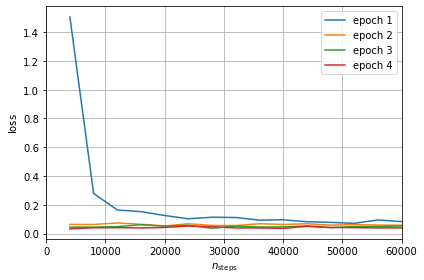

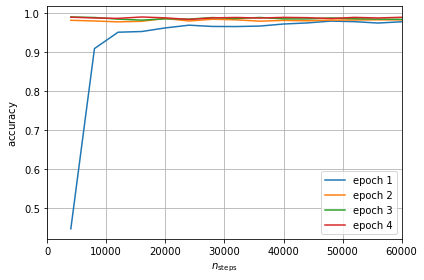

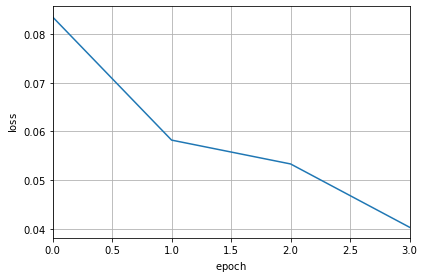

No handles with labels found to put in legend.


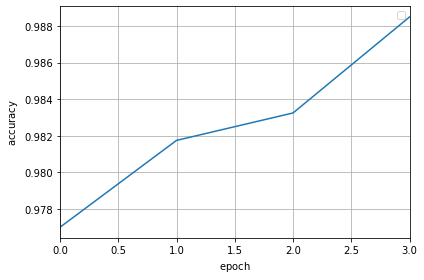

In [6]:
if not exists(save_file_name):

    # build the CNN 
    CNN = CNN3.CNN3(img_w, img_h, 1, CL_size_filters, CL_num_filters, MP_size, FC_size, num_labels)

    print('MNIST CNN initialized') 

    # train the CNN

    # number of steps elapsed 
    nsteps_l = []
    # loss function
    loss_l = []
    # accuracy
    acc_l = []

    print('\n\n— Start of training —')
    for epoch in range(n_epochs):
        nsteps_l.append([])
        loss_l.append([])
        acc_l.append([])
        print('\n— Epoch {:d} of {:d} —\n'.format(epoch+1, n_epochs))

        # shuffle the training data
        permutation = np_permutation(len(train_images))
        train_images = train_images[permutation]
        train_labels = train_labels[permutation]

        # set the loss and number of correctly predicted labels to 0
        loss = 0.
        num_correct = 0

        # for each image in the training set, train the CNN and update the loss and number of correctly-predicted labels
        for i, (im, label) in enumerate(zip(train_images, train_labels)): 
            results = CNN.train(train_images[i][newaxis,:], int(train_labels[i]), learn_rate, p_dropout)
            loss += results[0]
            num_correct += results[1]
            # if i is a multiple of n_print, print the loss and accuracy            
            if i % n_print == n_print - 1:
                nsteps_l[-1].append(i)
                loss_l[-1].append(loss / n_print)
                acc_l[-1].append(num_correct / n_print)
                print('Step {:d} — average loss: {:.10f}, accuracy: {:.3f}%'.format(i+1, loss/n_print, num_correct*100./n_print))
                # reset the loss and number of correctly-preducted labels
                loss = 0.
                num_correct = 0

    # save the CNN
    CNN.save(save_file_name)

    # plot the evolution of the loss function
    for e in range(n_epochs):
        plt.plot(nsteps_l[e], loss_l[e], label='epoch {:d}'.format(e+1))
    plt.xlim(0, n_train_images)
    plt.xlabel(r'$n_{\mathrm{steps}}$')
    plt.ylabel(r'$\mathrm{loss}$')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

    # plot the evolution of the accuracy
    for e in range(n_epochs):
        plt.plot(nsteps_l[e], acc_l[e], label='epoch {:d}'.format(e+1))
    plt.xlim(0, n_train_images)
    plt.xlabel(r'$n_{\mathrm{steps}}$')
    plt.ylabel(r'$\mathrm{accuracy}$')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # plot the evolution of the loss function - epoch to epoch
    plt.plot(range(n_epochs), [l[-1] for l in loss_l])
    plt.xlim(0, n_epochs-1)
    plt.xlabel(r'$\mathrm{epoch}$')
    plt.ylabel(r'$\mathrm{loss}$')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # plot the evolution of the accuracy  - epoch to epoch
    plt.plot(range(n_epochs), [l[-1] for l in acc_l])
    plt.xlim(0, n_epochs-1)
    plt.xlabel(r'$\mathrm{epoch}$')
    plt.ylabel(r'$\mathrm{accuracy}$')
    plt.grid()
    plt.tight_layout()
    plt.show()

Notice that the accuracy seems to keep increasing. 
The results are thus not expected to be optimal. 

We then load the CNN:

In [7]:
CNN = CNN3.CNN3()
CNN.load(save_file_name)

Finally, we test the CNN on the training set and print the loss and accuracy:

In [8]:
print('\n\n— Testing the CNN —\n')
loss = 0.
num_correct = 0
for i, (im, label) in enumerate(zip(test_images, test_labels)):
    results = CNN.forward_la(im[newaxis,:], int(label))
    loss += results[0]
    num_correct += results[1]
print('Test Loss:', loss / n_test_images)
print('Test Accuracy:', num_correct / n_test_images)



— Testing the CNN —

Test Loss: 0.07268418572875272
Test Accuracy: 0.9801


The accuracy is larger than 98%, which seems decent.

## Performance

### Choice of hyperparameters

### Comparison with a Tensorflow implementation

## Conclusion

## Appendix: The implementation

### Structure

### Convolutional layer

### ReLU layer

### Maxpool layer

### Fully-connected layer

### Softmax activation function